In [1]:
#cargar librerias
import time
from selenium import webdriver
from selenium.webdriver.support.ui import Select
from bs4 import BeautifulSoup as bs
from urllib import request
import requests
import base64
from IPython import display
from base64 import b64decode
import asyncio
from pyppeteer import launch
from PIL import Image
import io
from io import BytesIO
import matplotlib.pyplot as plt
import pytesseract
import cv2
import numpy as np

# Ruta completa al ejecutable de Tesseract OCR
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract'



In [2]:
#Cargar bot
url="https://www.runt.com.co/consultaCiudadana/#/consultaVehiculo"
driver = webdriver.Chrome('./chromedriver')
driver.get(url)


C:\Users\bagomezv\AppData\Local\Temp\ipykernel_28824\4101460775.py:3: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('./chromedriver')
Error getting version of chromedriver 115. Retrying with chromedriver 114 (attempt 1/5)


In [ ]:
#No Funciono
# Codificar la imagen en base64
imagen_base64 = base64.b64encode(contenido_imagen).decode('utf-8')

print(imagen_base64)
display.Image(b64decode(imagen_base64))

In [ ]:
#No Funciono
contenido_imagen = driver.execute_script("return (function(){var xhr = new XMLHttpRequest();xhr.open('GET', '" + src + "', false);xhr.setRequestHeader('Content-Type', 'application/x-www-form-urlencoded');xhr.send();return xhr.responseText;})();")
imagen_base64 = base64.b64encode(contenido_imagen.encode('utf-8')).decode('utf-8')
print(imagen_base64)
display.Image(b64decode(imagen_base64))

In [ ]:
#No Funciono
capcha=driver.find_element("xpath",'//*[@id="imgCaptcha"]')
src = capcha.get_attribute("src")
respuesta = requests.get(src)
contenido_imagen = respuesta.content

# Abrir la imagen con PIL
imagen = Image.open(BytesIO(contenido_imagen))

# Mostrar la imagen
plt.imshow(imagen)
plt.axis('off')
plt.show()

In [3]:
#Tomo Screenshot
#FUnciona como screnshot y corta la imagen
# Encontrar el elemento de imagen del captcha
captcha = driver.find_element("xpath",'//*[@id="imgCaptcha"]')

# Obtener la ubicación y tamaño del elemento del captcha
location = captcha.location
size = captcha.size

# Capturar una captura de pantalla completa de la página
screenshot = driver.get_screenshot_as_png()
screenshot = Image.open(io.BytesIO(screenshot))

# Calcular las coordenadas de recorte del captcha
left = int(location['x'])+100

top = int(location['y'])+100
right = int(location['x']+100 + size['width'])
bottom = int(location['y']+100 + size['height'])
print(left)

# Recortar la imagen del captcha de la captura de pantalla
captcha_image = screenshot.crop((left, top, right, bottom))

ruta_salida = r"C:\Users\bagomezv\Documents\GitHub\scrapspi\salida.txt"

# Realizar OCR en la imagen del captcha
captcha_text = pytesseract.image_to_string(captcha_image)


# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)
# Mostrar la imagen
captcha_image.show()


1030
Texto del captcha: 


In [4]:
# Convertir la imagen a escala de grises
gray_image = captcha_image.convert('L')

# Aplicar umbral adaptativo de Otsu para binarizar la imagen
threshold_image = gray_image.point(lambda x: 255 if x > 128 else 0, '1')

# Mostrar la imagen binarizada
threshold_image.show()

In [27]:
import cv2
import numpy as np

# Convertir la imagen del captcha a una matriz NumPy
captcha_array = np.array(captcha_image)
# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(captcha_array, cv2.COLOR_BGR2GRAY)

# Aplicar un filtro de mediana para eliminar el ruido
filtered_image = cv2.medianBlur(gray_image, 3)

# Mostrar la imagen filtrada
cv2.imshow("Imagen filtrada", filtered_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(filtered_image)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [39]:
# Convertir la imagen del captcha a una matriz NumPy
captcha_array = np.array(captcha_image)

# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(captcha_array, cv2.COLOR_BGR2GRAY)

# Aplicar umbralización adaptativa para obtener una máscara
_, binary_image = cv2.threshold(gray_image, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Encontrar contornos en la imagen binaria
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara en blanco del mismo tamaño que la imagen original
mask = np.zeros_like(gray_image)

# Rellenar los contornos en la máscara
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Aplicar el filtrado adaptativo
restored_image = cv2.inpaint(gray_image, mask, 3, cv2.INPAINT_TELEA)

# Convertir la imagen restaurada a color (3 canales)
restored_color_image = cv2.cvtColor(restored_image, cv2.COLOR_GRAY2BGR)

# Mostrar la imagen restaurada
cv2.imshow("Imagen restaurada", restored_color_image)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [58]:
import cv2
import numpy as np

# Convertir la imagen del captcha a una matriz NumPy en escala de grises
captcha_array = np.array(captcha_image.convert('L'))

# Aplicar umbralización adaptativa para obtener una máscara del texto
_, binary_image = cv2.threshold(captcha_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Encontrar contornos en la imagen binaria
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara en blanco del mismo tamaño que la imagen original
mask = np.zeros_like(captcha_array)

# Rellenar los contornos en la máscara
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Aplicar el filtrado adaptativo para eliminar el texto
restored_image = cv2.inpaint(captcha_array, mask, 3, cv2.INPAINT_TELEA)

# Mostrar la imagen resultante sin el texto
cv2.imshow("Imagen sin texto", restored_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(restored_image)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [13]:
# Convertir la imagen del captcha a una matriz NumPy en escala de grises
captcha_array = np.array(captcha_image.convert('L'))

# Aplicar umbralización adaptativa para obtener una máscara del texto
_, binary_image = cv2.threshold(captcha_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Encontrar contornos en la imagen binaria
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara en blanco del mismo tamaño que la imagen original
mask = np.zeros_like(captcha_array)

# Rellenar los contornos en la máscara
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Aplicar la máscara a la imagen original
highlighted_image = cv2.bitwise_and(captcha_array, captcha_array, mask=mask)

# Mostrar la imagen resultante resaltando el texto
cv2.imshow("Texto resaltado", highlighted_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(highlighted_image)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [12]:
# Convertir la imagen del captcha a una matriz NumPy en escala de grises
captcha_array = np.array(captcha_image.convert('L'))

# Aplicar umbralización adaptativa para obtener una máscara del texto
_, binary_image = cv2.threshold(captcha_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Encontrar contornos en la imagen binaria
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara en blanco del mismo tamaño que la imagen original
mask = np.zeros_like(captcha_array)

# Rellenar los contornos en la máscara
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Aplicar la máscara a la imagen original para quitar el contenido fuera del contorno
masked_image = cv2.bitwise_and(captcha_array, captcha_array, mask=mask)

# Mostrar la imagen resultante con el contenido fuera del contorno eliminado
cv2.imshow("Imagen sin contenido fuera del contorno", masked_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(masked_image)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [63]:
# Convertir la imagen del captcha a una matriz NumPy en escala de grises
captcha_array = np.array(captcha_image.convert('L'))

# Aplicar umbralización adaptativa para obtener una máscara del texto
_, binary_image = cv2.threshold(captcha_array, 0, 255, cv2.THRESH_BINARY_INV + cv2.THRESH_OTSU)

# Encontrar contornos en la imagen binaria
contours, _ = cv2.findContours(binary_image, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

# Crear una máscara en blanco del mismo tamaño que la imagen original
mask = np.zeros_like(captcha_array)

# Rellenar los contornos en la máscara
cv2.drawContours(mask, contours, -1, (255), thickness=cv2.FILLED)

# Aplicar la máscara a la imagen original para quitar el texto y los contornos
removed_image = cv2.bitwise_and(captcha_array, cv2.bitwise_not(mask))

# Reemplazar la región correspondiente en la imagen original con el área sin texto y contornos
captcha_array[np.where(mask)] = removed_image[np.where(mask)]

# Mostrar la imagen original sin el texto y los contornos
cv2.imshow("Imagen original sin texto y contornos", captcha_array)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(captcha_array)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [64]:
type(captcha_image)

PIL.Image.Image

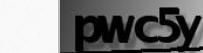

In [5]:
#visualizar screenshot
# Convertir la imagen PIL a modo RGB
image_rgb = captcha_image.convert('RGB')
# Guardar la imagen RGB en un búfer en formato JPEG
buffer = BytesIO()
image_rgb.save(buffer, format='JPEG')
image_bytes = buffer.getvalue()

# Codificar la secuencia de bytes a base64
base64_image = base64.b64encode(image_bytes).decode('utf-8')

display.Image(b64decode(base64_image))

In [67]:
base64_image

'/9j/4AAQSkZJRgABAQAAAQABAAD/2wBDAAgGBgcGBQgHBwcJCQgKDBQNDAsLDBkSEw8UHRofHh0aHBwgJC4nICIsIxwcKDcpLDAxNDQ0Hyc5PTgyPC4zNDL/2wBDAQkJCQwLDBgNDRgyIRwhMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjIyMjL/wAARCAA1AMsDASIAAhEBAxEB/8QAHwAAAQUBAQEBAQEAAAAAAAAAAAECAwQFBgcICQoL/8QAtRAAAgEDAwIEAwUFBAQAAAF9AQIDAAQRBRIhMUEGE1FhByJxFDKBkaEII0KxwRVS0fAkM2JyggkKFhcYGRolJicoKSo0NTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uHi4+Tl5ufo6erx8vP09fb3+Pn6/8QAHwEAAwEBAQEBAQEBAQAAAAAAAAECAwQFBgcICQoL/8QAtREAAgECBAQDBAcFBAQAAQJ3AAECAxEEBSExBhJBUQdhcRMiMoEIFEKRobHBCSMzUvAVYnLRChYkNOEl8RcYGRomJygpKjU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6goOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4uPk5ebn6Onq8vP09fb3+Pn6/9oADAMBAAIRAxEAPwDh1FLJdQW4zLKifU80qjv/AJNc3faDe3uqTSblEbNkFj0HpQBvR63prOFF2uf901qwukiho2DKehU1wlz4ceCBnW4R2UZKhcfrmo9B1iSwvURmJgc7WU9vpQB6OgqO61C009Fa7nWMHoD/APWpk17BbWr3ErgKg/M15vq2py6

In [7]:
#Quitar sombra
img=np.array(captcha_image)
rgb_planes = cv2.split(img)

result_planes = []
result_norm_planes = []
for plane in rgb_planes:
    dilated_img = cv2.dilate(plane, np.ones((7,7), np.uint8))
    bg_img = cv2.medianBlur(dilated_img, 21)
    diff_img = 255 - cv2.absdiff(plane, bg_img)
    norm_img = cv2.normalize(diff_img,None, alpha=0, beta=255, norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8UC1)
    result_planes.append(diff_img)
    result_norm_planes.append(norm_img)
    
result = cv2.merge(result_planes)
result_norm = cv2.merge(result_norm_planes)



In [8]:
#Visualizar sin sombra
cv2.imshow("Imagen original sin texto y contornos", result_norm)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(result_norm)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [83]:
# Convertir cada plano en un arreglo de 2 dimensiones
result_norm_planes_2d = [plane.reshape(plane.shape[0], plane.shape[1]) for plane in result_norm]

# Convertir la lista de arreglos en un arreglo NumPy
result_norm_2d = np.array(result_norm_planes_2d)
# Verificar la forma del arreglo resultante
print("Forma del arreglo resultante:", result_norm_2d.shape)
cv2.imshow("Imagen original sin texto y contornos", result_norm_2d)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(result_norm_2d)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Forma del arreglo resultante: (53, 203, 4)
Texto del captcha: 


In [9]:
#convertir escala de grises
# Convertir la imagen a escala de grises
gray_image = cv2.cvtColor(result_norm, cv2.COLOR_BGR2GRAY)
# Verificar la forma del arreglo resultante
print("Forma del arreglo resultante:", gray_image.shape)
print(gray_image.ndim)
# Mostrar la imagen en escala de grises
cv2.imshow('Imagen en escala de grises', gray_image)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(gray_image)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Forma del arreglo resultante: (53, 203)
2
Texto del captcha: 


In [40]:
#Supongamos que tienes una imagen en escala de grises representada como un arreglo numpy llamado "gray_image"

# Obtener el valor del píxel en una posición específica
x = 100  # coordenada x del píxel
y = 10  # coordenada y del píxel

pixel_value = gray_image[y, x]

# Imprimir el valor del píxel
print("Valor del píxel en la posición ({}, {}): {}".format(x, y, pixel_value))

Valor del píxel en la posición (100, 10): 251


In [16]:
#Covertir Blanco y negro
# Supongamos que tienes una imagen en escala de grises llamada "gray_image"
# donde los píxeles se representan como un arreglo NumPy

# Aplicar la condición y asignar 0 a los valores menores de 100
n=190
gray_imagen = np.where(gray_image > n, 255, gray_image)
gray_imagex = np.where(gray_imagen < n, 0, gray_imagen)

# Mostrar la imagen en escala de grises
cv2.imshow('Imagen en escala de grises', gray_imagex)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(gray_imagex)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [13]:
# Load an color image in grayscale
captcha_array = np.array(captcha_image)
img = gray_imagex
ret,thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)
cv2.imshow('grey image',thresh_img)
cv2.imwrite("result11.jpg", thresh_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(thresh_img)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [17]:
#quitar lineas
# Load an color image in grayscale
captcha_array = np.array(captcha_image)
img = gray_imagex
kernel = cv2.getStructuringElement(cv2.MORPH_RECT, (1,6))
morph_img = cv2.morphologyEx(gray_imagex, cv2.MORPH_CLOSE, kernel)
cv2.imshow('grey image',morph_img)
cv2.imwrite("result11.jpg", morph_img)
cv2.waitKey(0)
cv2.destroyAllWindows()
captcha_text = pytesseract.image_to_string(morph_img)
# Mostrar el texto del captcha
print("Texto del captcha:", captcha_text)

Texto del captcha: 


In [58]:
cv2.imshow('grey image',captcha_array)
cv2.imwrite("result11.jpg", captcha_array)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
ret,thresh_img = cv2.threshold(img, 0, 255, cv2.THRESH_BINARY_INV|cv2.THRESH_OTSU)